In [2]:
#imports
from ctgan import load_demo
from ctgan import CTGANSynthesizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

In [1]:
data = load_demo()

In [35]:
data.info

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

In [3]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

In [4]:
ctgan = CTGANSynthesizer()
ctgan.fit(data, discrete_columns, epochs=5)

Epoch 1, Loss G: 1.8761, Loss D: -1.2498
Epoch 2, Loss G: 1.1968, Loss D: 0.0374
Epoch 3, Loss G: 1.0989, Loss D: 0.3056
Epoch 4, Loss G: 0.8304, Loss D: -0.1337
Epoch 5, Loss G: 0.5540, Loss D: 0.0276


In [36]:
samples = ctgan.sample(32561)

In [37]:
samples

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,31.0629,Private,113795,Bachelors,8.99632,Never-married,Adm-clerical,Husband,White,Male,21.8902,4.10763,50.8904,United-States,<=50K
1,17.7986,Private,176012,Some-college,10.3897,Never-married,Craft-repair,Husband,Black,Female,22.3336,-0.214558,40.1116,United-States,<=50K
2,27.9415,Self-emp-not-inc,72185.9,Some-college,6.96266,Married-civ-spouse,Other-service,Husband,Black,Female,688.226,2.68843,7.29441,United-States,<=50K
3,63.7693,?,281334,Prof-school,13.0886,Married-civ-spouse,Prof-specialty,Husband,White,Female,36.0659,2.17129,40.0453,United-States,<=50K
4,49.0612,Private,105094,HS-grad,10.4018,Never-married,Armed-Forces,Wife,White,Male,-97.4902,2.19254,48.7063,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,28.7574,Self-emp-not-inc,238348,Masters,4.67751,Never-married,Exec-managerial,Husband,Other,Male,-33.4584,0.60211,39.9703,United-States,>50K
32557,45.7891,Private,205535,9th,10.2782,Never-married,Tech-support,Husband,White,Male,47.2043,3.5542,40.0044,United-States,<=50K
32558,40.4731,Federal-gov,287957,11th,14.0679,Widowed,Farming-fishing,Husband,White,Male,-59.5713,5.50614,44.368,Germany,>50K
32559,35.176,Private,287390,HS-grad,9.02702,Never-married,Other-service,Not-in-family,White,Female,33.4465,3.92081,39.9463,United-States,>50K


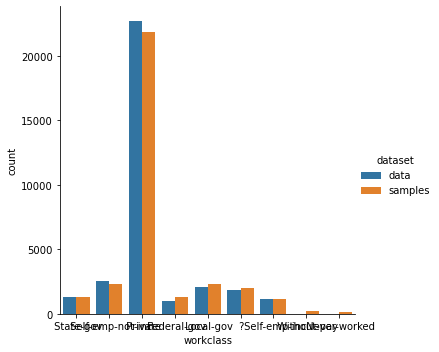

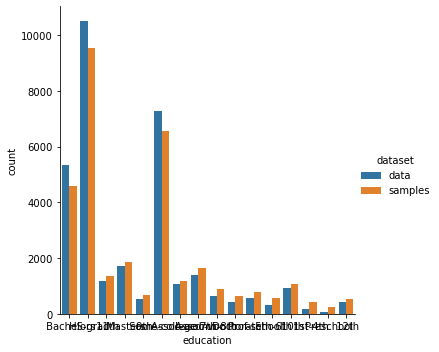

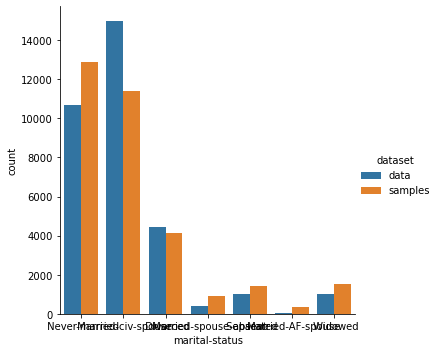

In [40]:
concatenated = pd.concat([data.assign(dataset='data'), samples.assign(dataset='samples')])
sns.catplot(x="workclass", kind="count", data=concatenated,hue='dataset')
sns.catplot(x="education", kind="count", data=concatenated,hue='dataset')
sns.catplot(x="marital-status", kind="count", data=concatenated,hue='dataset')

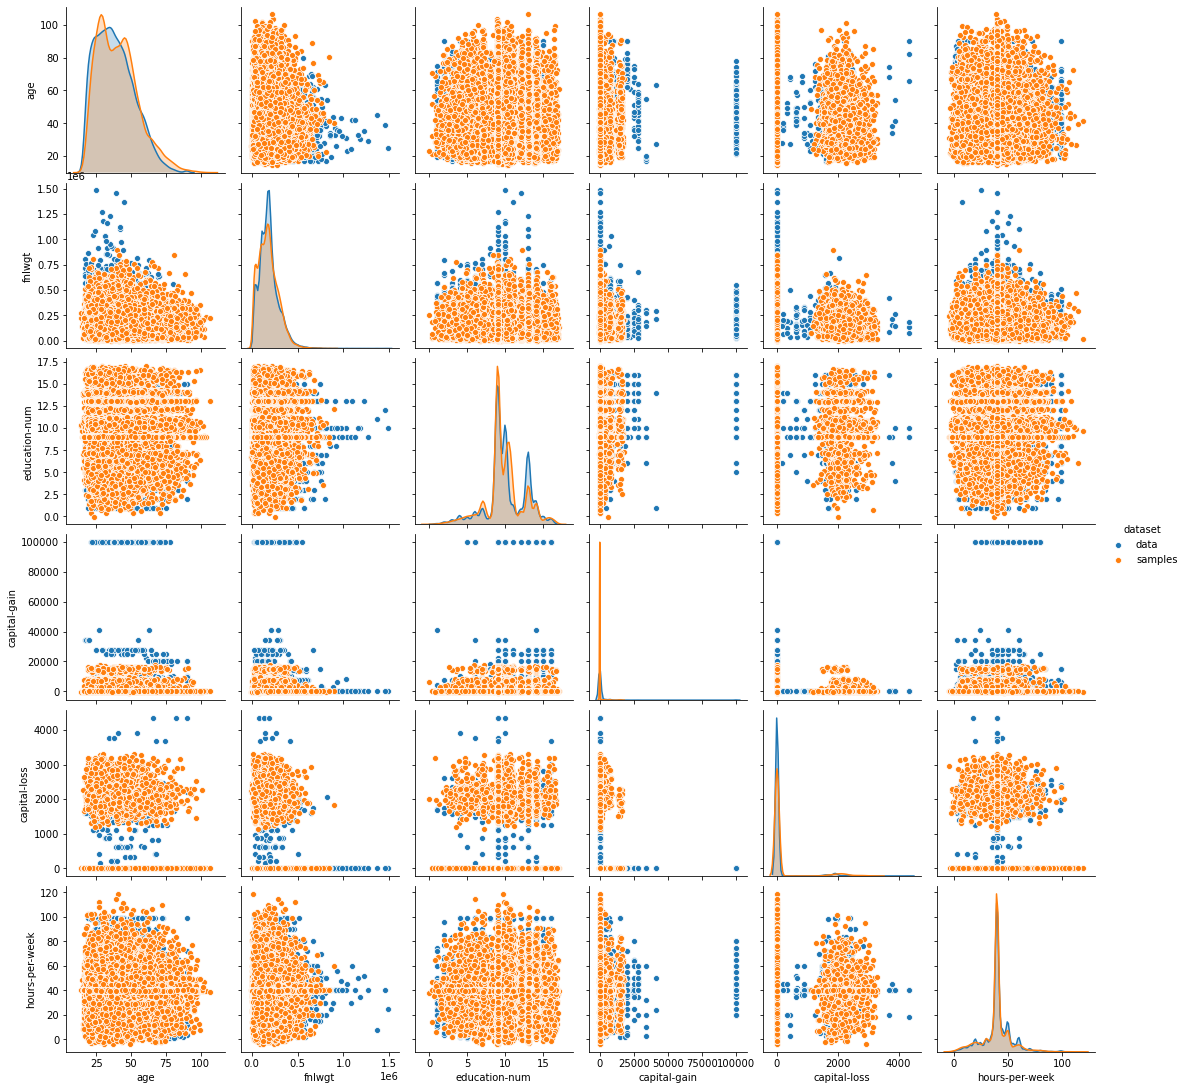

In [43]:
sns.pairplot(concatenated, hue="dataset",)

## Testing with ICU data for breast cancer

In [4]:
icu=pd.read_csv("dataR2 (2).csv")

In [5]:
icu.info

<bound method DataFrame.info of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.0

In [6]:
icu.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
icu_discrete_columns = [
    'Classification'
]

In [54]:
sinth_model = CTGANSynthesizer()
#needs both
np.random.seed(42)
torch.manual_seed(42)
sinth_model.fit(icu, icu_discrete_columns,epochs=500)

Epoch 1, Loss G: 0.7030, Loss D: -0.0071
Epoch 2, Loss G: 0.7077, Loss D: 0.0476
Epoch 3, Loss G: 0.6982, Loss D: -0.0063
Epoch 4, Loss G: 0.7176, Loss D: 0.0150
Epoch 5, Loss G: 0.6958, Loss D: -0.0172
Epoch 6, Loss G: 0.6794, Loss D: -0.0433
Epoch 7, Loss G: 0.6914, Loss D: -0.0606
Epoch 8, Loss G: 0.7012, Loss D: -0.0846
Epoch 9, Loss G: 0.6912, Loss D: -0.1116
Epoch 10, Loss G: 0.6969, Loss D: -0.1300
Epoch 11, Loss G: 0.6823, Loss D: -0.0996
Epoch 12, Loss G: 0.6663, Loss D: -0.1639
Epoch 13, Loss G: 0.6601, Loss D: -0.1988
Epoch 14, Loss G: 0.6328, Loss D: -0.2172
Epoch 15, Loss G: 0.6135, Loss D: -0.1912
Epoch 16, Loss G: 0.5949, Loss D: -0.2572
Epoch 17, Loss G: 0.6139, Loss D: -0.3076
Epoch 18, Loss G: 0.5229, Loss D: -0.3838
Epoch 19, Loss G: 0.5151, Loss D: -0.3574
Epoch 20, Loss G: 0.4860, Loss D: -0.3448
Epoch 21, Loss G: 0.4678, Loss D: -0.3727
Epoch 22, Loss G: 0.4354, Loss D: -0.4143
Epoch 23, Loss G: 0.3657, Loss D: -0.4334
Epoch 24, Loss G: 0.3747, Loss D: -0.3333
Epo

Epoch 192, Loss G: -0.8821, Loss D: -0.0769
Epoch 193, Loss G: -1.0114, Loss D: 0.1785
Epoch 194, Loss G: -0.8734, Loss D: 0.0450
Epoch 195, Loss G: -0.8948, Loss D: 0.0391
Epoch 196, Loss G: -0.8735, Loss D: 0.0217
Epoch 197, Loss G: -0.8726, Loss D: 0.1683
Epoch 198, Loss G: -0.8126, Loss D: -0.0925
Epoch 199, Loss G: -0.8291, Loss D: 0.0580
Epoch 200, Loss G: -0.7241, Loss D: -0.0725
Epoch 201, Loss G: -0.8563, Loss D: -0.2351
Epoch 202, Loss G: -0.8662, Loss D: -0.1103
Epoch 203, Loss G: -0.8074, Loss D: -0.1022
Epoch 204, Loss G: -0.8940, Loss D: -0.2462
Epoch 205, Loss G: -0.9981, Loss D: -0.0872
Epoch 206, Loss G: -0.8398, Loss D: -0.1140
Epoch 207, Loss G: -0.9600, Loss D: -0.0324
Epoch 208, Loss G: -1.0285, Loss D: -0.0252
Epoch 209, Loss G: -0.9831, Loss D: -0.0392
Epoch 210, Loss G: -1.0998, Loss D: -0.0693
Epoch 211, Loss G: -1.1084, Loss D: 0.0200
Epoch 212, Loss G: -1.1522, Loss D: -0.0861
Epoch 213, Loss G: -1.1865, Loss D: -0.1346
Epoch 214, Loss G: -1.2279, Loss D: 0.1

In [55]:
icu_samples = sinth_model.sample(115)

In [56]:
icu_concatenated = pd.concat([icu.assign(dataset='original'), icu_samples.assign(dataset='sinthetic')])

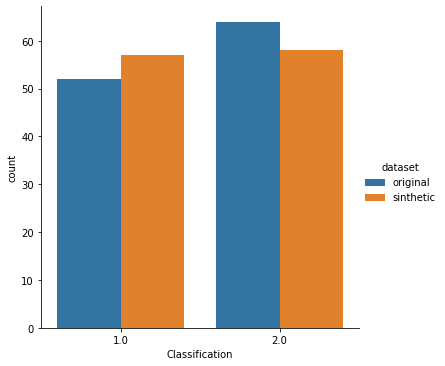

In [57]:
sns.catplot(x="Classification", kind="count", data=icu_concatenated,hue='dataset')

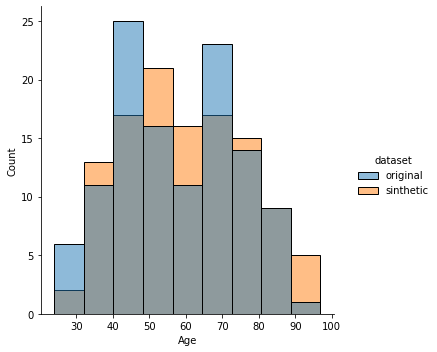

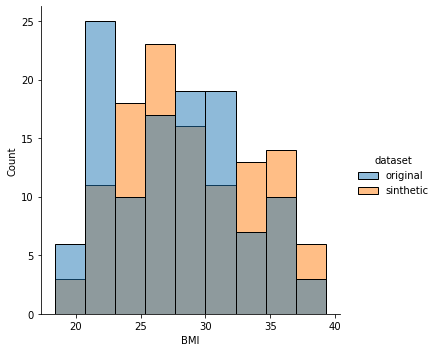

In [58]:
sns.displot(data=icu_concatenated, x="Age", hue="dataset")
sns.displot(data=icu_concatenated, x="BMI", hue='dataset')

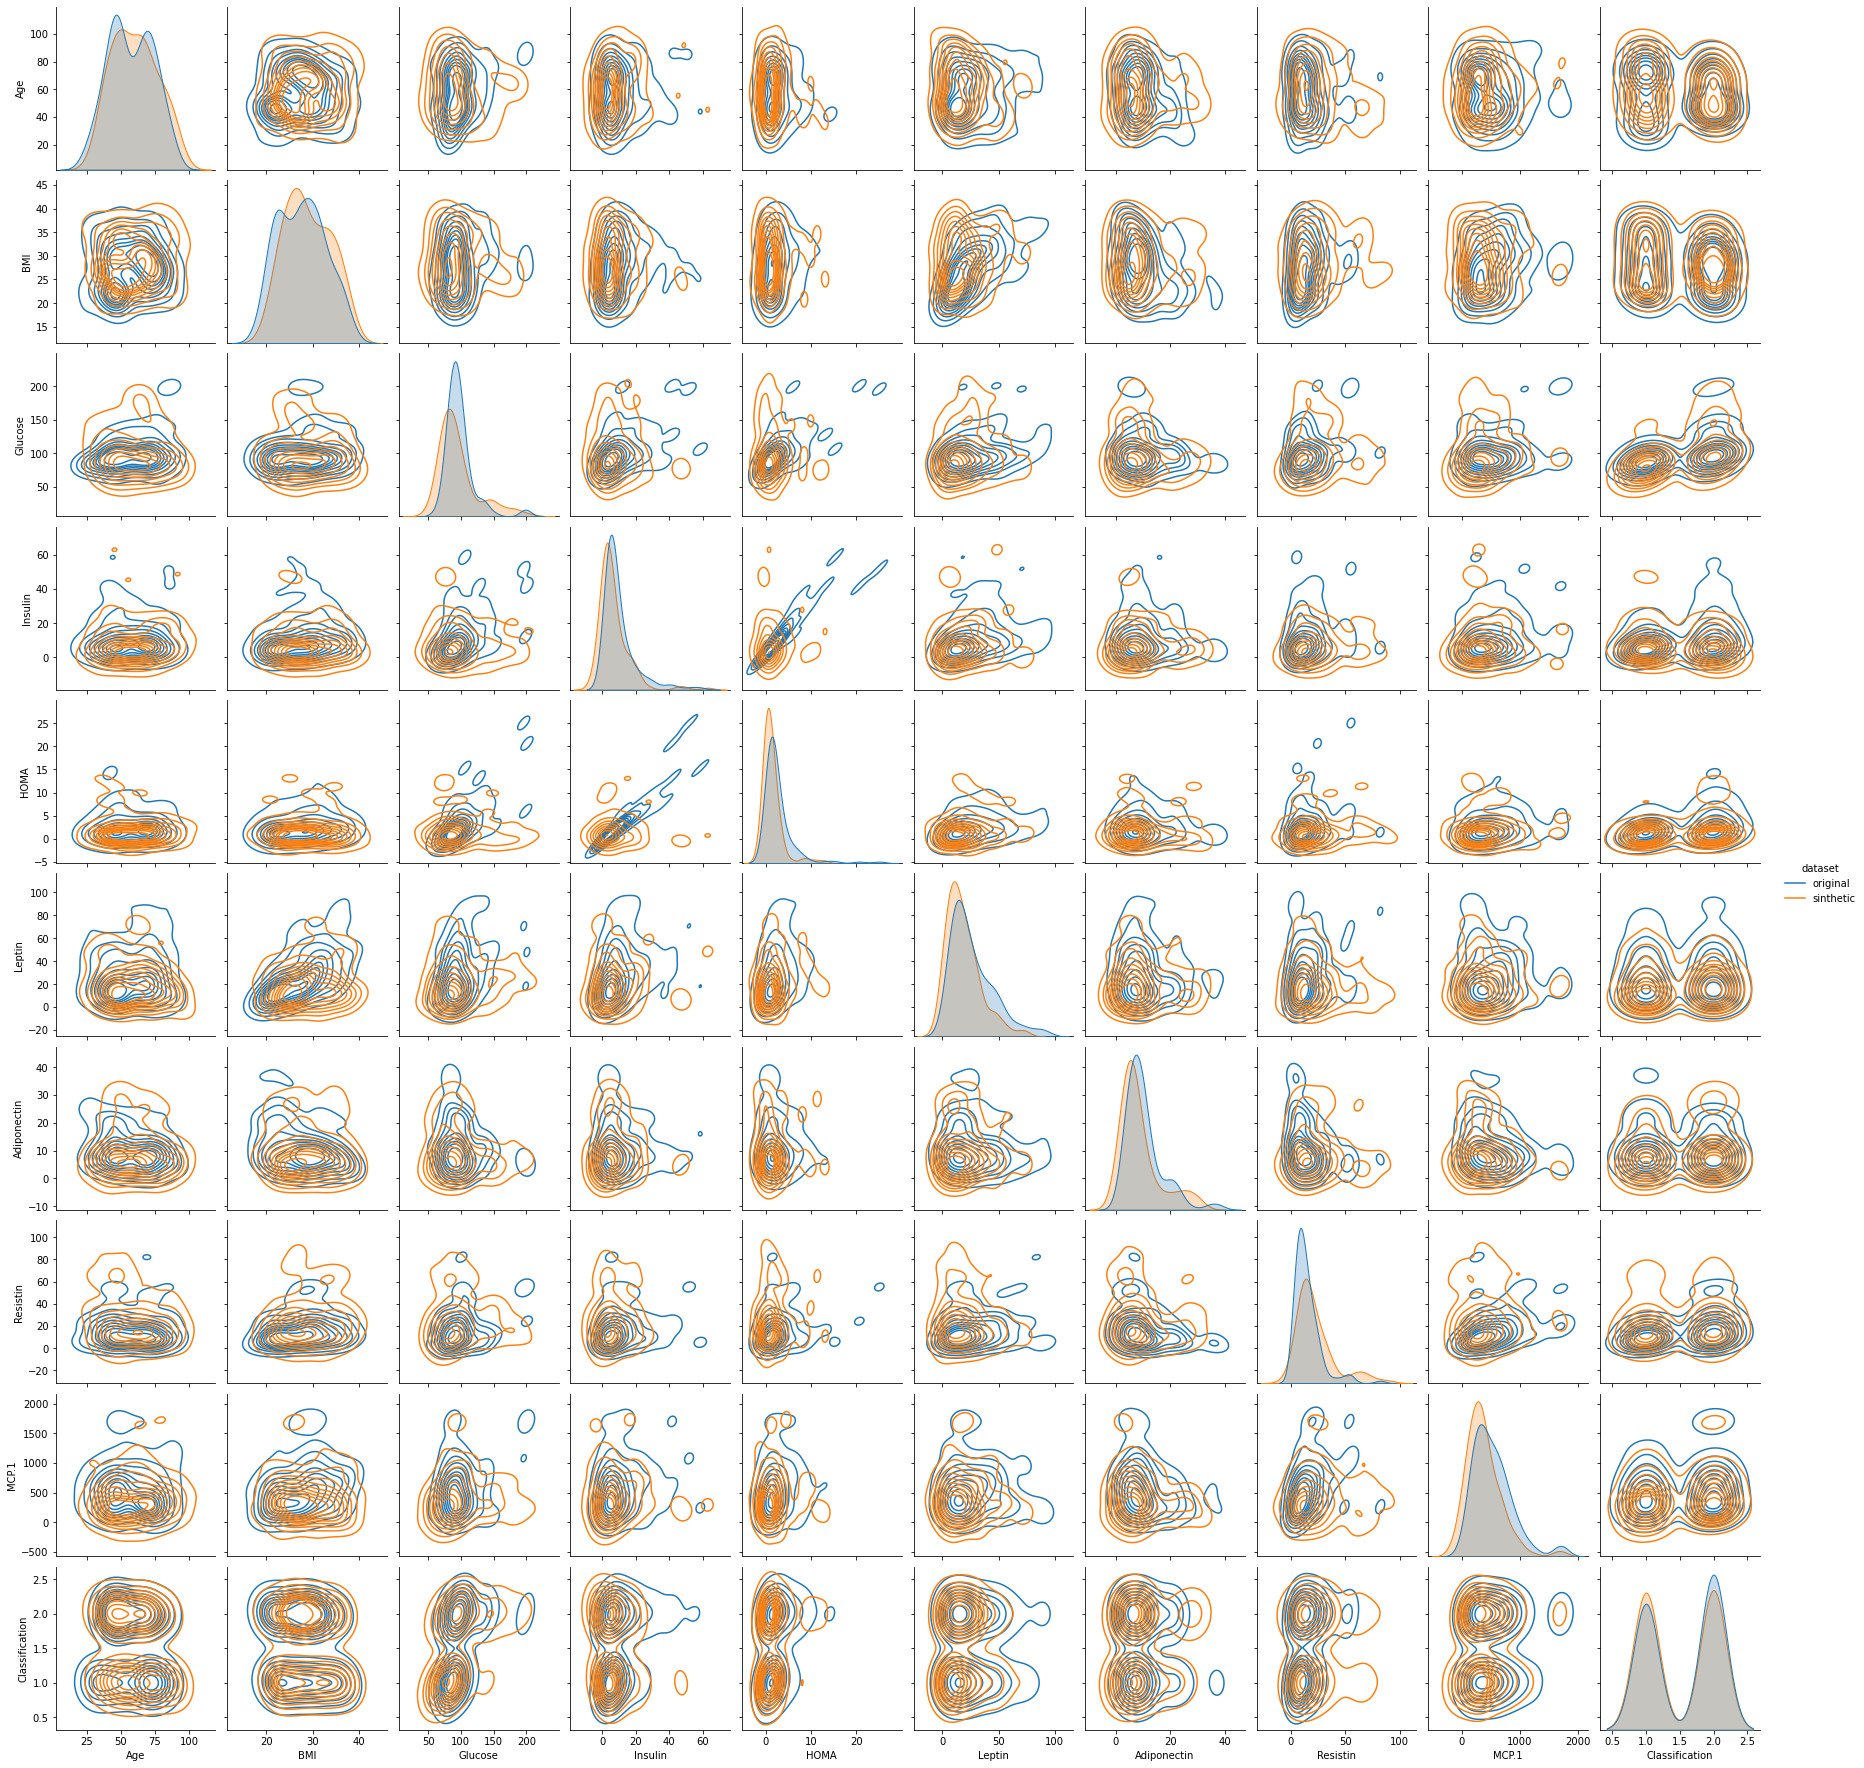

In [59]:
sns.pairplot(icu_concatenated, hue="dataset",kind="kde")

## Gretel synthetics test

não consegui colocar a funcionar...

In [26]:
t=pd.read_csv("C:/Users/joaof/OneDrive/Pessoal/HEADS/05. TESE/2. dados sinteticos/dataR2 (2).csv")

In [47]:
tt = pd.concat([t,t,t,t,t,t,t,t,t,t])
tt.to_csv("tt.csv")

In [48]:
from pathlib import Path

from gretel_synthetics.config import LocalConfig

# Create a config that we can use for both training and generating data
# The default values for ``max_lines`` and ``epochs`` are optimized for training on a GPU.

config = LocalConfig(
    max_lines=0,         # maximum lines of training data. Set to ``0`` to train on entire file
    max_line_len=2048,   # the max line length for input training data
    epochs=15,           # 15-50 epochs with GPU for best performance
    vocab_size=20000,    # tokenizer model vocabulary size
    gen_lines=1000,      # the number of generated text lines
    dp=True,             # train with differential privacy enabled (privacy assurances, but reduced accuracy)
    field_delimiter=",", # specify if the training text is structured, else ``None``
    overwrite=True,      # overwrite previously trained model checkpoints
    checkpoint_dir=(Path.cwd() / 'checkpoints').as_posix(),
    input_dahttp://localhost:8888/notebooks/OneDrive/Pessoal/HEADS/05.%20TESE/2.%20dados%20sinteticos/ctgan%20testing.ipynb#ta_path="tt.csv" # filepath or S3
)
# Train a model
# The training function only requires our config as a single arg
from gretel_synthetics.train import train_rnn

train_rnn(config)

2020-09-24 23:09:04,311 : MainThread : INFO : Loading training data from tt.csv
2020-09-24 23:09:04,324 : MainThread : INFO : Storing annotations to training_data.txt
2020-09-24 23:09:04,347 : MainThread : INFO : Dataset size: 1161 lines, 117192 characters
2020-09-24 23:09:04,349 : MainThread : INFO : Training SentencePiece tokenizer
2020-09-24 23:09:11,649 : MainThread : INFO : Loading tokenizer from: m.model
2020-09-24 23:09:11,661 : MainThread : INFO : Tokenizer model vocabulary size: 1334 tokens
2020-09-24 23:09:11,664 : MainThread : INFO : Mapping first line of training data

'<d>Age<d>BMI<d>Glucose<d>Insulin<d>HOMA<d>Leptin<d>Adiponectin<d>Resistin<d>MCP.1<d>Classification<n>'
 ---- sample tokens mapped to pieces ---- > 
▁, <d>, A, g, e, <d>, B, M, I, <d>, G, l, u, c, o, s, e, <d>, I, n, s, u, l, i, n, <d>, H, O, M, A, <d>, L, e, p, ti, n, <d>, A, d, i, p, on, e, c, ti, n, <d>, R, e, si, s, ti, n, <d>, M, C, P, ., 1, <d>, C, l, a, s, s, i, f, i, c, a, ti, on, <n>

2020-09-24 23:0

Train for 6 steps
Epoch 1/15
6/6 [==============================] - 16s 3s/step - loss: 7.1686 - accuracy: 0.1128
Epoch 2/15
6/6 [==============================] - 10s 2s/step - loss: 4.8860 - accuracy: 0.2514
Epoch 3/15
6/6 [==============================] - 10s 2s/step - loss: 4.6457 - accuracy: 0.2657
Epoch 4/15
6/6 [==============================] - 10s 2s/step - loss: 4.6265 - accuracy: 0.2654
Epoch 5/15
6/6 [==============================] - 10s 2s/step - loss: 4.6368 - accuracy: 0.2645
Epoch 6/15
6/6 [==============================] - 10s 2s/step - loss: 4.6191 - accuracy: 0.2655
Epoch 7/15
6/6 [==============================] - 10s 2s/step - loss: 4.6082 - accuracy: 0.2660
Epoch 8/15
6/6 [==============================] - 10s 2s/step - loss: 4.6278 - accuracy: 0.2655
Epoch 9/15
6/6 [==============================] - 10s 2s/step - loss: 4.6144 - accuracy: 0.2656
Epoch 10/15
6/6 [==============================] - 10s 2s/step - loss: 4.6074 - accuracy: 0.2657
Epoch 11/15
6/6 [====

2020-09-24 23:11:49,436 : MainThread : INFO : Saving model history to model_history.csv
2020-09-24 23:11:49,446 : MainThread : INFO : Saving model history to model_params.json
2020-09-24 23:11:49,458 : MainThread : INFO : Saving model to C:/Users/joaof/OneDrive/Pessoal/HEADS/05. TESE/2. dados sinteticos/checkpoints\synthetic
2020-09-24 23:11:49,529 : MainThread : INFO : (0.8207479463304205, 17.0)


DP-SGD with sampling rate = 0.0546% and noise_multiplier = 1.1 iterated over 27467 steps satisfies differential privacy with eps = 0.821 and delta = 8.533005665915763e-06.
The optimal RDP order is 17.0.


## SDGYM
É necessário fazer tweaks aos parametros dos varios redes (usar ubuntu para bayes)

In [71]:
##sdgym kernel
import pandas as pd
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
cbc=pd.read_csv("data/dataR2 (2).csv")
hd=pd.read_csv("data/processed.cleveland.data")


In [49]:
cbc.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [50]:
cbc_np=np.array(cbc)

In [51]:
synthesizer = IndependentSynthesizer()
synthesizer.fit(cbc_np, [10],[1,2,3,4,5,6,7,8,9])

sampled = synthesizer.sample(116)

In [58]:
sampled=pd.DataFrame(sampled)
sampled
sampled.columns=cbc.columns

In [59]:
sampled["Classification"].unique()

array([2., 1.])

In [53]:
synthesizer2 = VEEGANSynthesizer()
synthesizer2.fit(cbc_np, [10],[1,2,3,4,5,6,7,8,9])

sampled2 = synthesizer2.sample(116)

In [54]:
sampled2=pd.DataFrame(sampled2)

In [55]:
sampled2.columns=cbc.columns

In [57]:
samp["Classification"].unique()

array([1.])

In [94]:
synthesizer3 = MedganSynthesizer()
synthesizer3.fit(cbc_np, [9])

sampled3 = synthesizer3.sample(116)

In [95]:
sampled3=pd.DataFrame(sampled3)
sampled3
sampled3.columns=cbc.columns

In [96]:
sampled3.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,6.322533,7.166016,5.869796,6.368976,6.279154,5.978856,5.993766,7.043294,8.243742,1.0
1,6.861675,8.154933,6.522698,7.140716,5.361422,4.901091,5.623082,7.045177,6.608824,1.0
2,6.567317,6.975899,7.178858,6.731285,5.807070,5.198453,5.564557,8.329473,8.498218,1.0
3,7.822908,6.658211,6.450409,6.522542,6.475203,6.087856,6.012057,6.070256,6.891823,1.0
4,8.411621,9.688702,7.094613,6.822331,5.844080,6.154573,6.970292,4.685420,6.968529,1.0
5,7.168668,6.990768,6.351777,6.059960,7.041935,6.469893,6.768796,7.527215,8.888319,2.0
6,8.304996,7.265779,6.797503,6.108994,4.566289,5.603151,5.216552,5.246386,6.517943,1.0
7,6.655072,7.028929,6.550408,5.653168,5.396684,6.192876,4.455601,6.287527,7.078587,1.0
8,6.845721,7.702334,5.718204,7.341315,7.055535,5.546009,6.219150,6.757686,6.313738,1.0
9,6.825330,7.534827,5.644197,7.129293,6.308044,5.595250,6.796751,7.175360,6.689000,1.0


In [97]:
sampled3["Classification"].unique()

array([1., 2.])

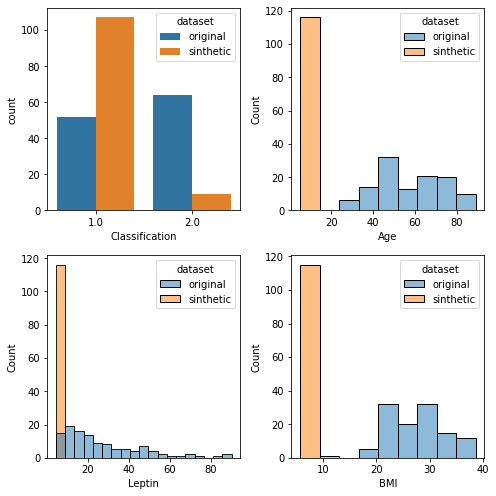

In [98]:
cbc_concatenated = pd.concat([cbc.assign(dataset='original'), sampled3.assign(dataset='sinthetic')])
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(x="Classification", data=cbc_concatenated,hue='dataset',ax=axes[0, 0])
sns.histplot(data=cbc_concatenated, x="Age", hue="dataset",ax=axes[0, 1])
sns.histplot(data=cbc_concatenated, x="Leptin", hue='dataset',ax=axes[1, 0])
sns.histplot(data=cbc_concatenated, x="BMI", hue='dataset',ax=axes[1, 1])
plt.tight_layout()